# **Project description**

*   This is an Image classification problem.
*   This data was collected from kaggle. https://www.kaggle.com/datasets/arjuntejaswi/plant-village


*   There were many foldes. But this project is about classifying potato disease so I only took necessary folders




In [30]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import *
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import *

In [2]:
IMAGE_SIZE = 256 #It was checked after downloading
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = image_dataset_from_directory(
    "/content/drive/MyDrive/python notebooks/Potato disease classification/potato_images/PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 2172 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names

In [5]:
len(dataset) #68 * 32 = 2172

68

In [6]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  # 3 is rgb channels

(32, 256, 256, 3)
[1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0]


In [7]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[143. 133. 132.]
  [135. 125. 124.]
  [143. 133. 132.]
  ...
  [174. 165. 168.]
  [172. 163. 166.]
  [170. 161. 164.]]

 [[137. 127. 126.]
  [135. 125. 124.]
  [135. 125. 124.]
  ...
  [175. 166. 169.]
  [174. 165. 168.]
  [172. 163. 166.]]

 [[141. 131. 130.]
  [141. 131. 130.]
  [136. 126. 125.]
  ...
  [173. 164. 167.]
  [171. 162. 165.]
  [170. 161. 164.]]

 ...

 [[102.  92. 100.]
  [129. 119. 127.]
  [111. 101. 109.]
  ...
  [146. 139. 147.]
  [148. 141. 149.]
  [146. 139. 147.]]

 [[101.  91.  99.]
  [118. 108. 116.]
  [119. 109. 117.]
  ...
  [146. 139. 147.]
  [146. 139. 147.]
  [142. 135. 143.]]

 [[124. 114. 122.]
  [132. 122. 130.]
  [140. 130. 138.]
  ...
  [143. 136. 144.]
  [142. 135. 143.]
  [136. 129. 137.]]], shape=(256, 256, 3), dtype=float32)


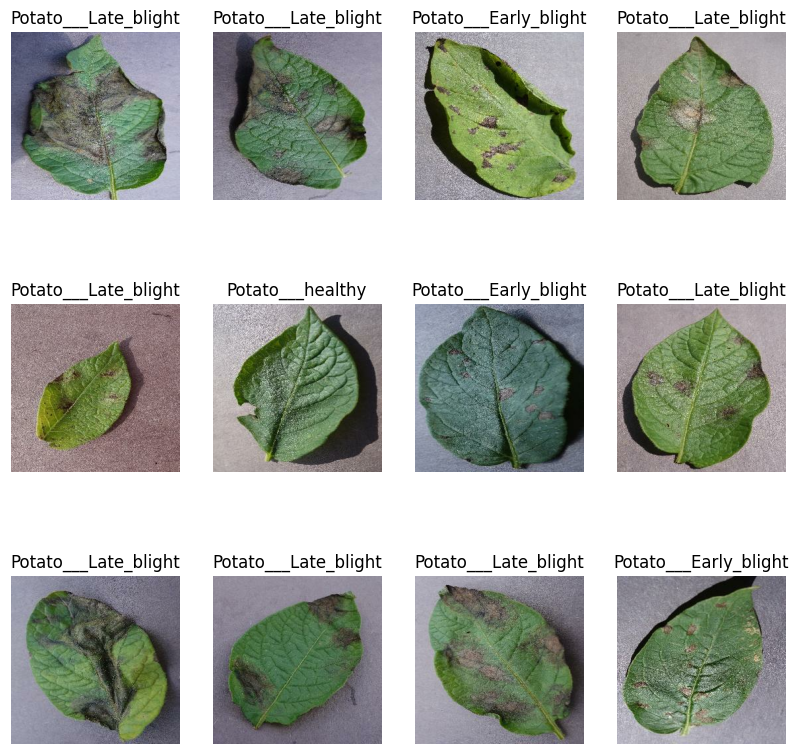

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

* 80% into training
* 20% into testing ->

1.   10% validation
2.   10% testing



In [9]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)


In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_ds = test_ds.take(6)

In [13]:
test_ds = test_ds.skip(6)

In [14]:
def get_dataset_partitions_tf(ds,train_split = 0.8,val_split = 0.1,test_split = 0.1,shuffle_size = 10000,shuffle = True):
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed = 12)
  train_size = int(train_split * ds_size)
  val_size   = int(val_split * ds_size)

  train_ds   = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds


In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [17]:
resize_and_rescale = tf.keras.Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
    Rescaling(1.0/255),
])


In [18]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2)
])

In [19]:
model = Sequential([
    resize_and_rescale,
    data_augmentation,
    Conv2D(32,(3,3),activation = 'relu', input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(3, activation = 'softmax')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.build(input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS))

In [21]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [22]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds,

)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 ━━━━━━━━━━━━━━━━━━━━ 258s 159ms/step - accuracy: 0.5826 - loss: 0.8238 - val_accuracy: 0.8438 - val_loss: 0.4697
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8286 - loss: 0.4542 - val_accuracy: 0.8854 - val_loss: 0.2949
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.8713 - loss: 0.3329 - val_accuracy: 0.9062 - val_loss: 0.2003
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9018 - loss: 0.2491 - val_accuracy: 0.9219 - val_loss: 0.1945
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9321 - loss: 0.1599 - val_accuracy: 0.9219 - val_loss: 0.2143
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9392 - loss: 0.1519 - val_accuracy: 0.9323 - val_loss: 0.1514
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9556 - loss: 0.1155 - val_accuracy: 0.9375 - val_loss: 0.1421
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9441 - loss: 0.1532 - val_accuracy: 0.9271 - val_loss:

In [23]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9608 - loss: 0.1211


In [25]:
scores
print("Validation loss ",scores[0])
print("Validation accuracy ",scores[1])

Validation loss  0.1437530219554901
Validation accuracy  0.953125


# Making predictions

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


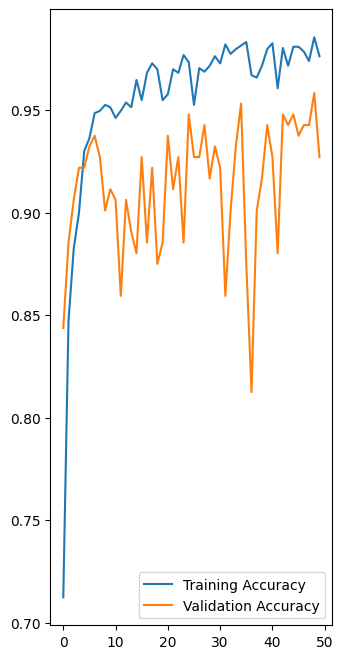

In [27]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title = 'Training and Validation Accuracy'


first image to predict
Actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted label: Potato___Late_blight


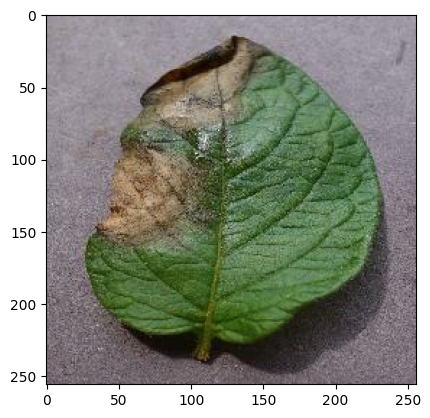

In [31]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0]

  print("first image to predict")
  plt.imshow(first_image)
  print("Actual label:" ,class_names[first_label])
  batch_prediction = model.predict(images_batch)
  print("Predicted label:",class_names[np.argmax(batch_prediction[0])])